# Time Series Forecasting For Arima Model

In this notebook, I will discuss ARIMA Model for time series forecasting. ARIMA model is used to forecast a time series using the series past values. In this notebokk, I build an optimal ARIMA model and extend it to Seasonal ARIMA (SARIMA) and SARIMAX models.

####  Introduction to Time Series Forecasting 

A Time Series is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

Forecasting is the step where we want to predict the future values the series is going to take. Forecasting a time series is often of tremendous commercial value.

#### Forecasting a time series can be broadly divided into two types.

If we use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting.

If we use predictors other than the series (like exogenous variables) to forecast it is called Multi Variate Time Series Forecasting.

This notebook focuses on a particular type of forecasting method called ARIMA modeling.

#### import the required library for time series forecasting

In [1]:
# for loading and reading the data set
import pandas as pd
import numpy as np

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

# for removing warnings
import warnings
warnings.filterwarnings('ignore')


#### load the date set from seaborn library

In [2]:
# load the data set
df = sns.load_dataset('flights')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


### exploratory data analysis (EDA)

In [3]:
# checking the missing value
if df.isnull().sum().sum() > 0:
    print ('there are some missing value in the data set')

else:
    print ('there are no missing value ')

there are no missing value 


In [4]:
# summary of the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [5]:
# formating the date column

df['date'] = '01-' + df['month'].astype(str) + '-'  + df['year'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# remove the month and year column
df.drop(['month','year'], axis = 'columns', inplace = True )


#### visualize the time series ( data )

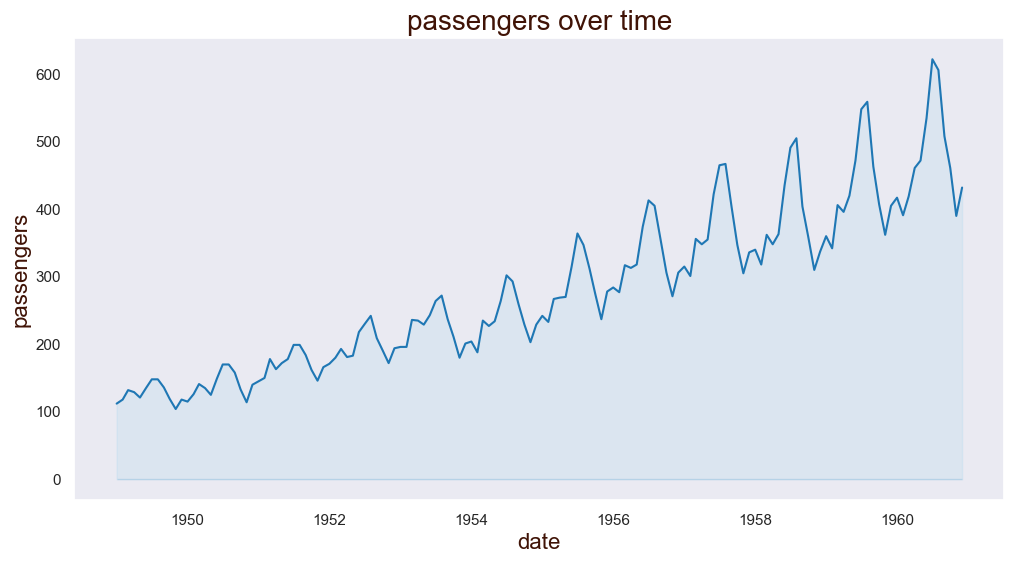

In [6]:
# set the theme
sns.set_theme(style="dark", palette=None)

# plot the fig
plt.figure(figsize=(12,6))
sns.lineplot(data = df , x = df.index , y = df['passengers'])

# Fill the area between the line plot and x-axis
plt.fill_between(data = df , x = df.index , y1 = df['passengers'], y2 = 0, alpha = .15, color = 'skyblue')
plt.hlines(y = 0, xmin = np.min(df.index), xmax = np.max(df.index), linewidth = 1, alpha = .15)

# set the title and label
plt.title('passengers over time', fontsize = 20, color = '#401306')
plt.xlabel('date', fontsize = 16, color = '#401306')
plt.ylabel('passengers', fontsize = 16, color = '#401306')
plt.show()

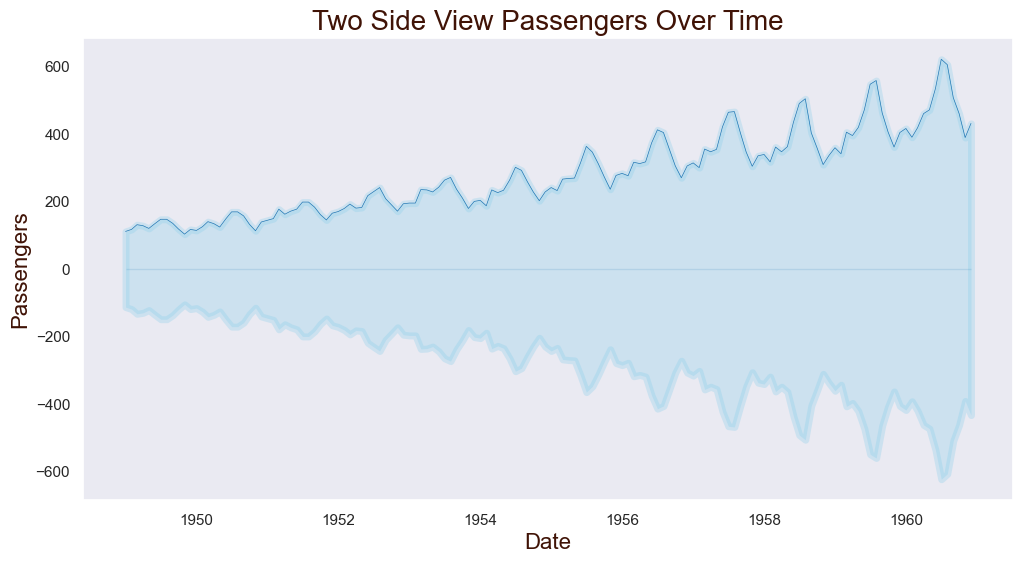

In [7]:
# Set the theme
sns.set_theme(style="dark", palette=None)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='passengers', linewidth = .5)

# Fill the area between the line plot and x-axis
plt.fill_between(df.index, y1=df['passengers'], y2= -df['passengers'],linewidth= 5, color='skyblue', alpha=0.3)
plt.hlines(y = 0, xmin = np.min(df.index), xmax = np.max(df.index), linewidth = 1, alpha = .15)

# set the title and label
plt.title('Two Side View Passengers Over Time', fontsize=20, color = '#401306')
plt.xlabel('Date', fontsize=16, color = '#401306')
plt.ylabel('Passengers', fontsize=16, color = '#401306')
plt.show()


#### introduction of arima models

ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.


ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
ARIMA Models are specified by three order parameters: (p, d, q),

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

#### Types of ARIMA Model

ARIMA : Non-seasonal Autoregressive Integrated Moving Averages

SARIMA : Seasonal ARIMA

SARIMAX : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

#### patterns in a time series

Any time series visualization may consist of the following components: 
Base Level + Trend + Seasonality + Error.

Trend

A trend is observed when there is an increasing or decreasing slope observed in the time series.

Seasonality

A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

#### decompositon of a time series

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

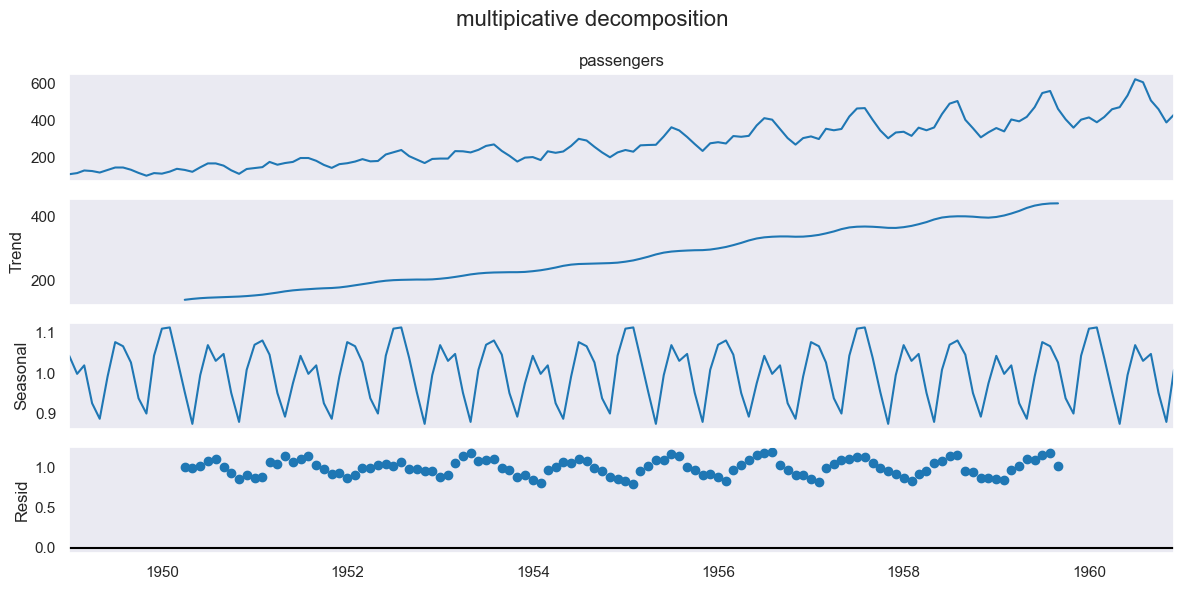

In [8]:
# import the library for seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# multiplicative decomposiition
multi_decomposition = seasonal_decompose(df['passengers'], model = 'multiplicative', period=30)

#plot for multipicative decomposition
plt.rcParams.update({'figure.figsize': (12,6)})
multi_decomposition.plot().suptitle('multipicative decomposition', fontsize= 16)
plt.tight_layout()


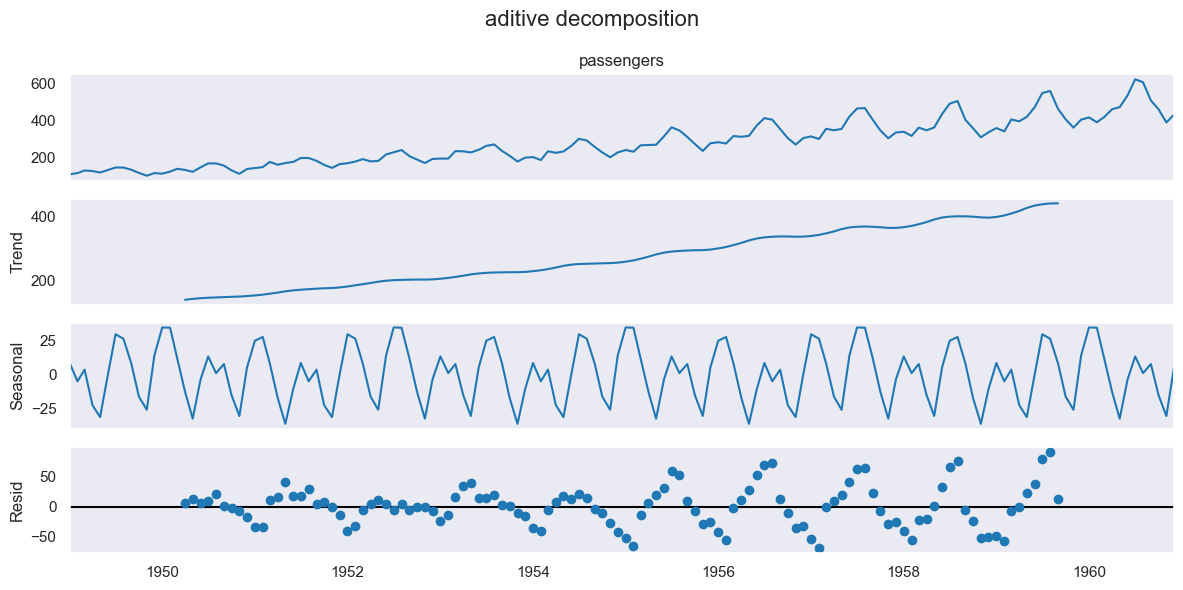

In [9]:
# aditive decomposition 
aditive_decomposition = seasonal_decompose(df['passengers'], model = 'adiative', period=30)

#plot for aditive decomposition
plt.rcParams.update({'figure.figsize': (12,6)})
aditive_decomposition.plot().suptitle('aditive decomposition', fontsize= 16)
plt.tight_layout()
plt.show()

#### the possible way to make a time series into stationary

We can apply some sort of transformation to make the time-series stationary. These transformation may include:

1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

#### reasons of converting a non-stationary series into stationary before forecasting

There are reasons why we want to convert a non-stationary series into a stationary one. These are given below:

1. Forecasting a stationary series is relatively easy and the forecasts are more reliable.
2. An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
3. We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

#### the way to check the stationarity

1. The stationarity of a series can be checked by looking at the plot of the series.
2. Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.
3. Augmented Dickey Fuller test (ADF Test)

In [8]:
# add a new column to to determine the order of d 
df['1st_diff'] = df['passengers'] - df['passengers'].shift()
df['2nd_diff'] = df['passengers'] - df['passengers'].shift(2)
df['1_log_diff'] = np.log(df['passengers'])- np.log(df['passengers'].shift(1))

In [13]:
# create a function for check the stationarity and p valule
def stationary_test(dataframe ,col):
    from statsmodels.tsa.stattools import adfuller
    adf_test = adfuller(dataframe.dropna()[col],autolag= 'AIC')
 


    roll_mean = dataframe[col].rolling(window = 12).mean()
    roll_std = dataframe[col].rolling(window = 12).std()

    plt.figure(figsize=(12,6))
    sns.lineplot(data= dataframe, x=dataframe.index, y=dataframe[col], linewidth= 1, color ='#067d71', label= col )
    plt.fill_between(x=dataframe.index, y1= 0, y2= dataframe[col], color = '#067d71', alpha= .2)

    sns.lineplot(data= dataframe, x= dataframe.index, y = dataframe[col].rolling(window =12).mean(), label = 'mean value')
    sns.lineplot(data= dataframe, x= dataframe.index, y = dataframe[col].rolling(window =12).std(), label = 'std value')
    plt.fill_between(x=dataframe.index, y1= roll_mean, y2= roll_std, color ='#e0a28b', alpha = .4 )
    plt.legend()
    plt.show()
    print('p value :' ,adf_test[1])

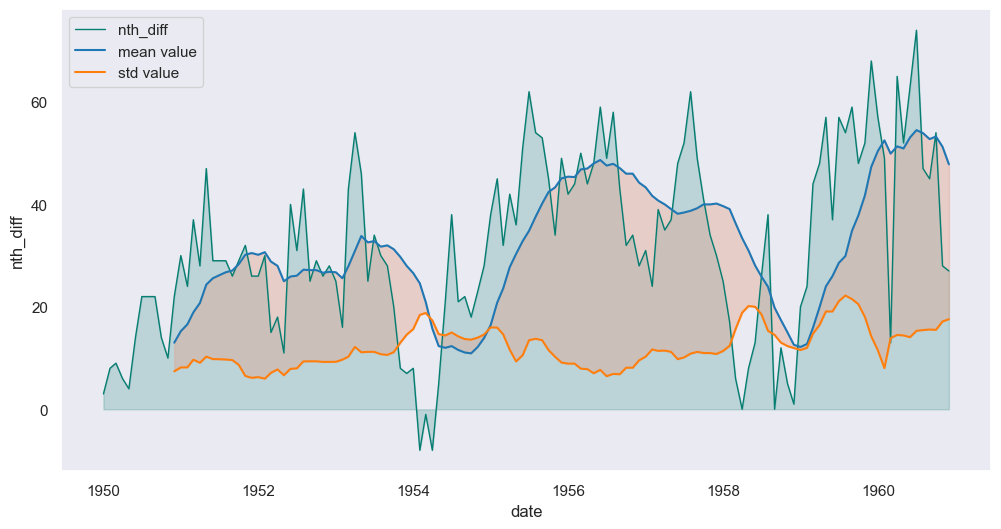

p value : 0.011551493085514954


In [18]:
# check stationarity through mean , std and p value
from statsmodels.tsa.stattools import adfuller

df['nth_diff'] = df['passengers'] - df['passengers'].shift(12)
stationary_test(df,'nth_diff')


adf_test = adfuller(df.dropna()['nth_diff'],autolag= 'AIC')
if adf_test[1] > .05:
    print('p value :',adf_test[1], 'n/')

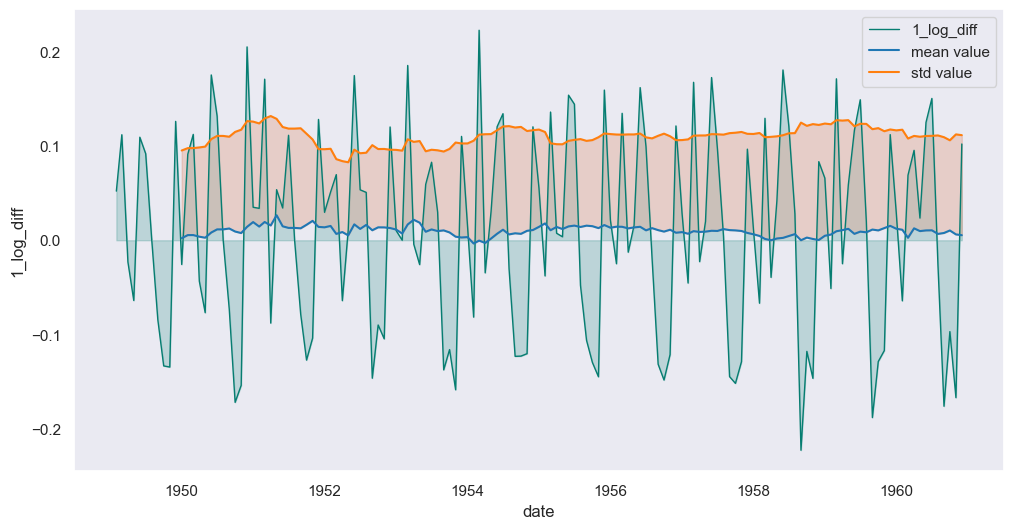

p value : 0.025656929217049724


In [19]:

stationary_test(df, '1_log_diff')

#### find out the order of AR term (p)

1. The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
2. Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.
3. Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
Yt=α0+α1Yt−1+α2Yt−2+α3Yt−3
 
4. That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient  α3
  of Y_t-3 in the above equation.
5. Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

<Figure size 1200x600 with 0 Axes>

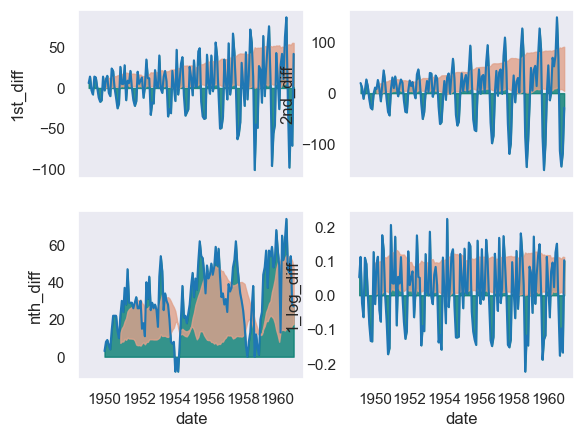

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))
fig, ax = plt.subplots(2, 2, sharex=True)

# List of column names for plotting
columns_to_plot = ['1st_diff', '2nd_diff', 'nth_diff', '1_log_diff']

for i, col in enumerate(columns_to_plot):
    sns.lineplot(x=df.index, y=df[col], ax=ax[i//2, i%2])


    roll_mean = df[col].rolling(window=12).mean()
    roll_std = df[col].rolling(window=12).std()
    ax[i//2, i%2].fill_between(x=df.index, y1=0, y2=df[col], color='#067d71', alpha=.8)
    ax[i//2, i%2].fill_between(x=df.index, y1=roll_mean, y2=roll_std, color='#e0a28b', alpha=.8)

plt.show()


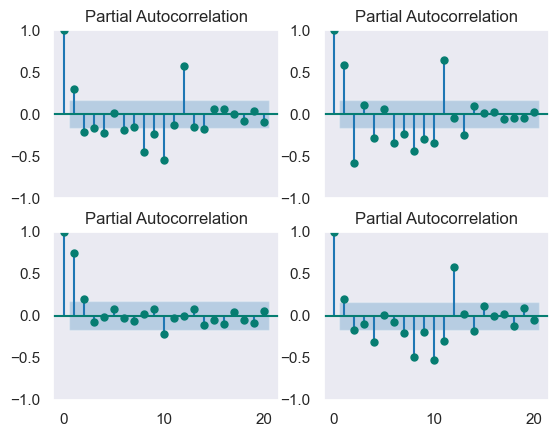

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [25]:
fig, ax = plt.subplots(2, 2, sharex=True)

# List of column names for plotting
columns_to_plot = ['1st_diff', '2nd_diff', 'nth_diff', '1_log_diff']

for i, col in enumerate(columns_to_plot):
    plt.figure(figsize=(12,6))
    plot_pacf(df[col].dropna(), lags = 20, color= '#067d71', ax= ax[i//2 ,i%2])

plt.show()

#### find out the order of MA term (q)

1. Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.
2. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.


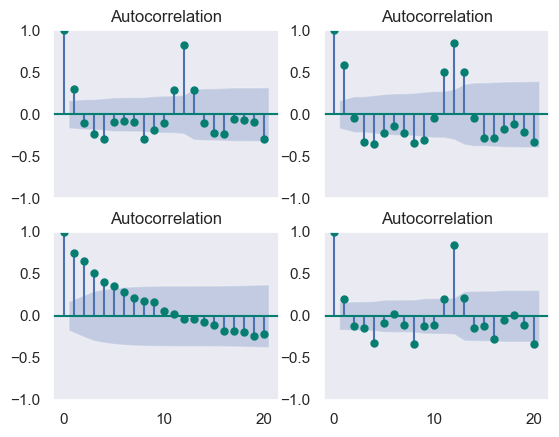

In [87]:
fig, ax = plt.subplots(2, 2, sharex=True)

# List of column names for plotting
columns_to_plot = ['1st_diff', '2nd_diff', 'nth_diff', '1_log_diff']

for i, col in enumerate(columns_to_plot):
    plot_acf(df[col].dropna(), lags = 20, color= '#067d71', ax= ax[i//2 ,i%2])

plt.show()

In [27]:
# split the df  for train and test 
limit = round(len(df)*70/100)
# train data
train = df[['passengers']][:limit] 
#test data
test = df[['passengers']][limit:]
print(train.head())
print('no of train data :',len(train))
print('======================')
print(test.tail())
print('no of test data :',len(test))

            passengers
date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
no of train data : 101
            passengers
date                  
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432
no of test data : 43


In [86]:
# import the arima model 
from statsmodels.tsa.arima.model import ARIMA
# Define the order of the ARIMA model
order = (1, 1, 3)

# Fit the ARIMA model
model_arima = ARIMA(test['passengers'], order=order)
model_arima = model_arima.fit()
pred_arima = model_arima.predict(start =test.index[0] , end=test.index[-1] )

# Print model summary
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                   43
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -216.847
Date:                Wed, 14 Feb 2024   AIC                            443.694
Time:                        13:32:13   BIC                            452.382
Sample:                    06-01-1957   HQIC                           446.878
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4941      0.266      1.858      0.063      -0.027       1.015
ma.L1         -0.2989      0.267     -1.119      0.263      -0.822       0.225
ma.L2         -0.2589      0.188     -1.377      0.1

C:\Users\WCS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WCS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WCS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
# create a data frame to store  the precdicted data
pred_arima_df = pd.DataFrame(pred_arima)
pred_arima_df.head()

,predicted_mean
1957-06-01,0.000000
1957-07-01,422.248465
1957-08-01,476.164879
1957-09-01,458.626025
1957-10-01,376.193926


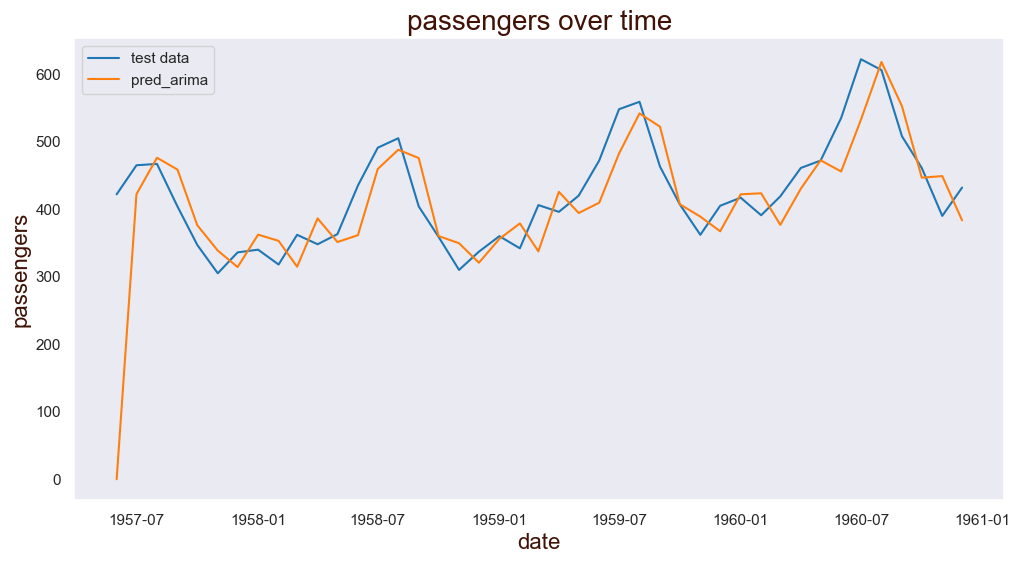

In [56]:
# set the theme
sns.set_theme(style="dark", palette=None)

# plot the test data
plt.figure(figsize=(12,6))
sns.lineplot(data = test , x = test.index , y = test['passengers'], label = 'test data')

# plot the precdicted data
sns.lineplot(data = pred_arima_df , x = pred_arima_df.index , y = pred_arima_df['predicted_mean'], label = 'pred_arima')


# set the title and label
plt.title('passengers over time', fontsize = 20, color = '#401306')
plt.xlabel('date', fontsize = 16, color = '#401306')
plt.ylabel('passengers', fontsize = 16, color = '#401306')
plt.legend()
plt.show()

In [64]:
# Forecast using ARIMA model
arima_pred_forecast = model_arima.forecast(steps=len(test))

# create a data frame to store  the forecast data
arima_pred_forecast_df = pd.DataFrame(arima_pred_forecast)

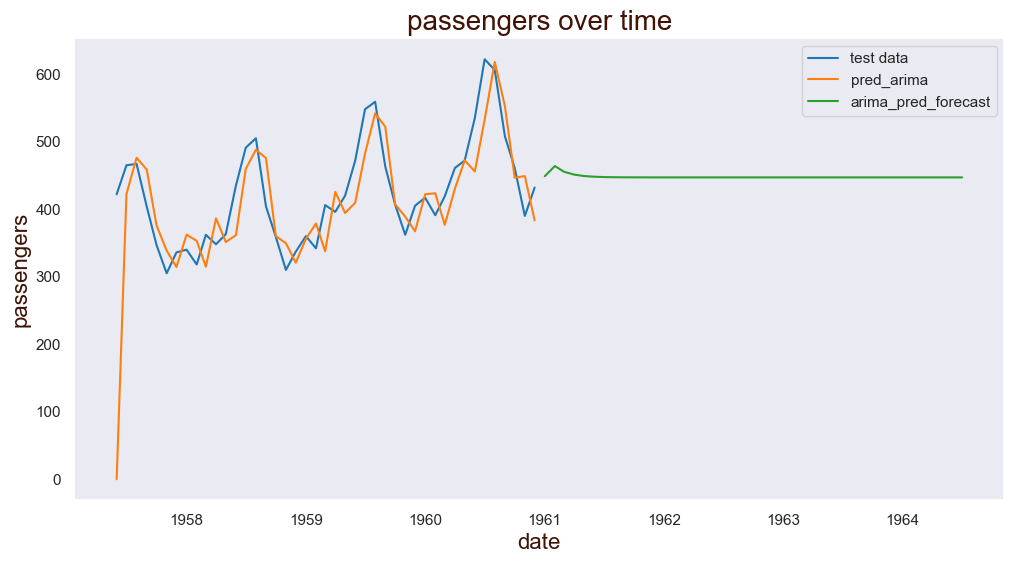

In [67]:
# set the theme
sns.set_theme(style="dark", palette=None)

# plot the test data
plt.figure(figsize=(12,6))
sns.lineplot(data = test , x = test.index , y = test['passengers'], label = 'test data')

# plot the precdicted data
sns.lineplot(data = pred_arima_df , x = pred_arima_df.index , y = pred_arima_df['predicted_mean'], label = 'pred_arima')

# plot the futute data
sns.lineplot(data = arima_pred_forecast_df , x = arima_pred_forecast_df.index , y = arima_pred_forecast_df['predicted_mean'], label = 'arima_pred_forecast')

# set the title and label
plt.title('passengers over time', fontsize = 20, color = '#401306')
plt.xlabel('date', fontsize = 16, color = '#401306')
plt.ylabel('passengers', fontsize = 16, color = '#401306')
plt.legend()
plt.show()


In [69]:
# precdicted  test data  using SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX  
model_sarimax = SARIMAX(test['passengers'], order = (1,1,3), seasonal_order= (1,1,3,12))
model_sarimax = model_sarimax.fit()
pred_sarimax = model_sarimax.predict( start = test.index[0], end= test.index[-1])

C:\Users\WCS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WCS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WCS\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
# create a data frame to store  the precdicted data
pred_sarimax_df = pd.DataFrame(pred_sarimax)

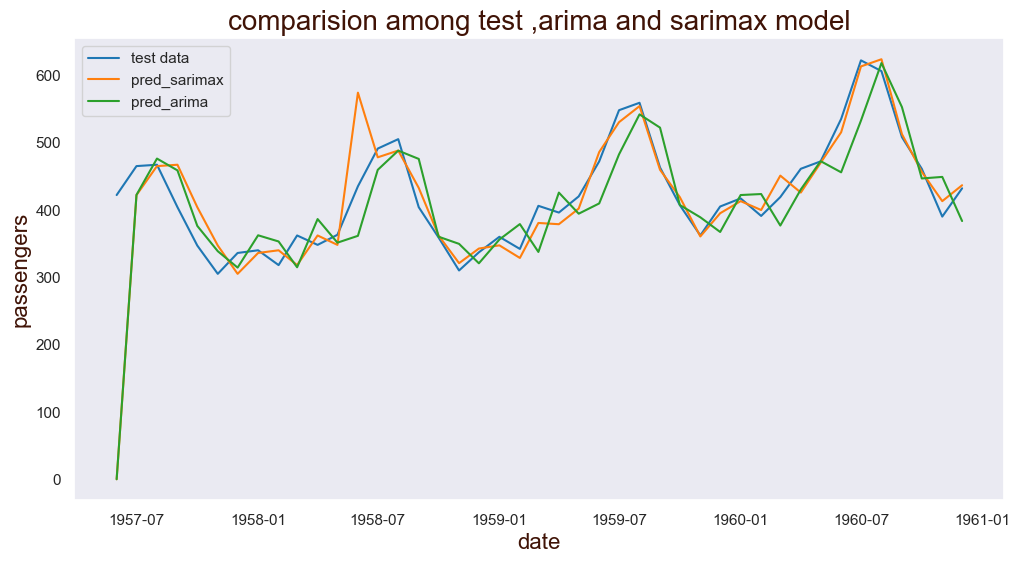

In [75]:
# set the theme
sns.set_theme(style="dark", palette=None)

# plot the test data
plt.figure(figsize=(12,6))
sns.lineplot(data = test , x = test.index , y = test['passengers'], label = 'test data')

# plot the precdicted data
sns.lineplot(data = pred_sarimax_df , x = pred_sarimax_df.index , y = pred_sarimax_df['predicted_mean'], label = 'pred_sarimax')
sns.lineplot(data = pred_arima_df , x = pred_arima_df.index , y = pred_arima_df['predicted_mean'], label = 'pred_arima')


# set the title and label
plt.title('comparison among test ,arima and sarimax model', fontsize = 20, color = '#401306')
plt.xlabel('date', fontsize = 16, color = '#401306')
plt.ylabel('passengers', fontsize = 16, color = '#401306')
plt.legend()
plt.show()

In [76]:
# Forecast using SARIMAX model
sarimax_pred_forecast = model_sarimax.forecast(steps=len(test))
# create a data frame to store  the forecast data
sarimax_pred_forecast_df = pd.DataFrame(sarimax_pred_forecast)

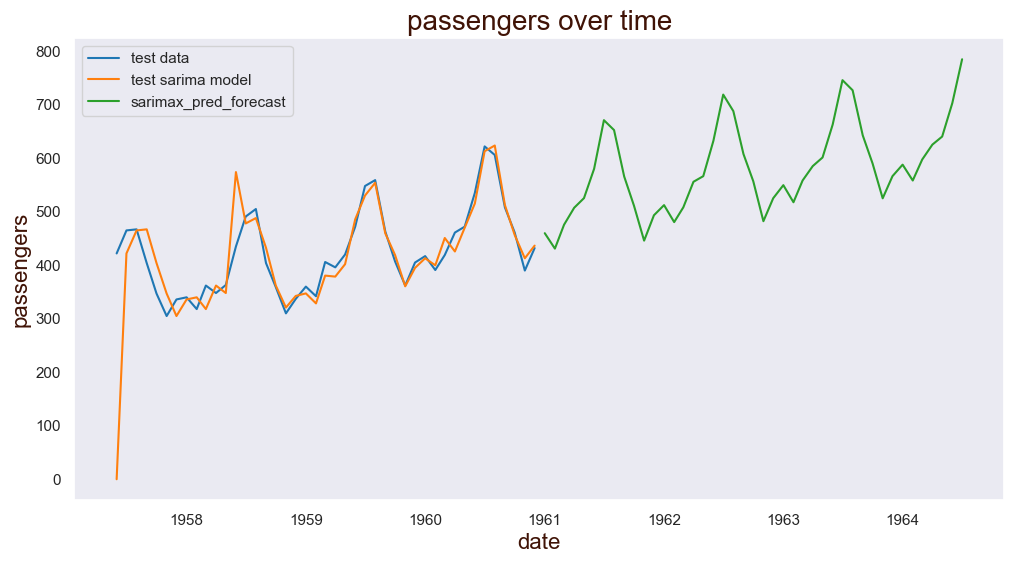

In [78]:
# set the theme
sns.set_theme(style="dark", palette=None)

# plot the test data
plt.figure(figsize=(12,6))
sns.lineplot(data = test , x = test.index , y = test['passengers'], label = 'test data')

# plot the precdicted data
sns.lineplot(data = pred_sarimax_df , x = pred_sarimax_df.index , y = pred_sarimax_df['predicted_mean'], label = 'test sarima model')

# plot the futute data
sns.lineplot(data = sarimax_pred_forecast_df , x = sarimax_pred_forecast_df.index , y = sarimax_pred_forecast_df['predicted_mean'], label = 'sarimax_pred_forecast')

# set the title and label
plt.title('passengers over time', fontsize = 20, color = '#401306')
plt.xlabel('date', fontsize = 16, color = '#401306')
plt.ylabel('passengers', fontsize = 16, color = '#401306')
plt.legend()
plt.show()

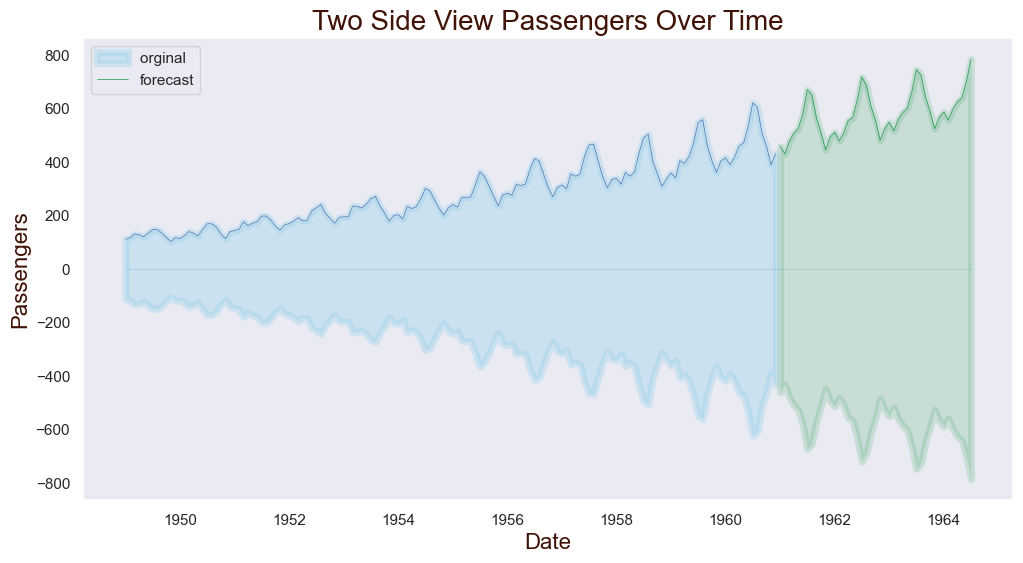

In [97]:
# Set the theme
sns.set_theme(style="dark", palette=None)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='passengers', linewidth = .5)

# Fill the area between the line plot and x-axis
plt.fill_between(df.index, y1=df['passengers'], y2= -df['passengers'],linewidth= 5, color='skyblue', alpha=0.3, label = 'orginal ')
plt.hlines(y = 0, xmin = np.min(df.index), xmax = np.max(sarimax_pred_forecast_df.index), linewidth = 1, alpha = .15)

# plot the forecast data
sns.lineplot(data = sarimax_pred_forecast_df , x = sarimax_pred_forecast_df.index , y = sarimax_pred_forecast_df['predicted_mean'], label = 'forecast', color = '#129441', linewidth = .5)
plt.fill_between(sarimax_pred_forecast_df.index, y1=sarimax_pred_forecast_df['predicted_mean'], y2= -sarimax_pred_forecast_df['predicted_mean'],linewidth= 5, color='#129441', alpha=0.15)

# set the title and label
plt.title('Two Side View Passengers Over Time', fontsize=20, color = '#401306')
plt.xlabel('Date', fontsize=16, color = '#401306')
plt.ylabel('Passengers', fontsize=16, color = '#401306')
plt.show()